Informal introduction to machine learning aka machine learning for the stupid (mainly myself).

In [1]:
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for visualization (plotting)

# to display plots inline (with the rest of the output) rather than in a separate window
%matplotlib inline

[-3  0  4]


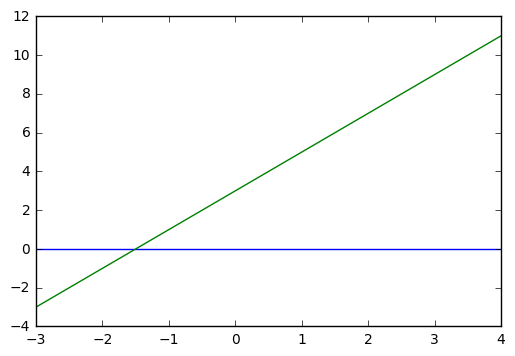

In [2]:
# A simple function for the machine to learn
def f(x):
    return 3 + 2 * x

# The machine eager to learn
class Machine:
    w = 0
    b = 0
    def h(self, x):
        return self.b + self.w * x
               
# Create the training sample: an array of random values of x for the machine to train with.
# why random though?
m = 3 # training sample size
np.random.seed(876)
training_input = np.random.randint(-5, 6, m)
print(training_input)

# Calculate correct values x of f for testing the machine
training_output = []
correct_values = []
machine = Machine()
for x in training_input:
    training_output.append(machine.h(x))
    correct_values.append(f(x))   
                                                         
# Visualize how badly the machine fails initially
#plt.plot(training_input, correct_values, 'ro')
plt.plot(training_input, training_output)
plt.plot(training_input, correct_values)
plt.show()

In [3]:
# Now let's train the machine

[-3  0  4]
[0, 0, 0]
[-3, 3, 11]
139


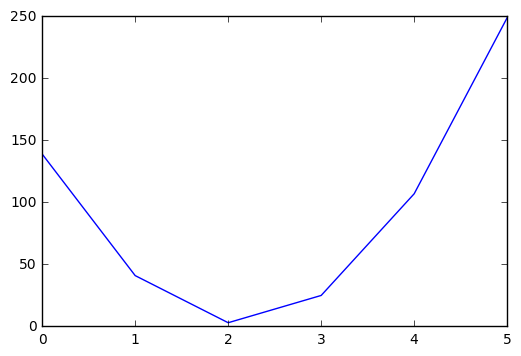

In [4]:
# Calculate the difference between machine's attempt and the correct values.

print(training_input)
print(training_output)
print(correct_values)

machine = Machine()
def loss(training_input):
    loss = 0
    for x in training_input:
        loss += (machine.h(x) - f(x))**2
        
    return loss    

print(loss(training_input))    

iterations = 6
losses = []
for i in range(0,iterations):
    losses.append(loss(training_input))     
    machine.w += 1
    machine.b += 1
   
plt.plot(losses)
plt.show()

[0, 0, 0]
[-2, 1, 5]
[-4, 2, 10]
[-6, 3, 15]
[-8, 4, 20]
[-10, 5, 25]


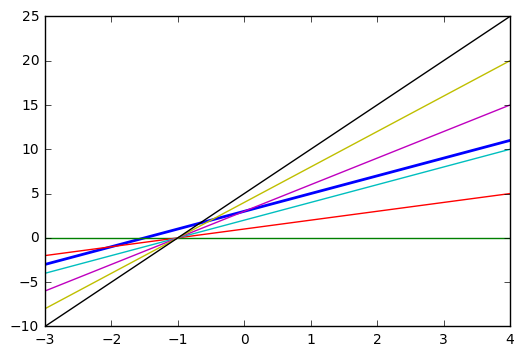

In [5]:
machine = Machine()
plt.plot(training_input, correct_values, linewidth=2.0)
for i in range(0,iterations):
    training_output = []
    for x in training_input:
        training_output.append(machine.h(x))
        
    machine.w += 1
    machine.b += 1
        
    print(training_output)    
    plt.plot(training_input, training_output)
    
plt.show()    

By a lucky strike we actually managed to get a pretty close approximation. But we want a system that can automatically adjust weight and bias in the right direction and tell when it has reached the best approximation.

# Gradient descent
Gradient descent is a popular method for doing exactly what we want: Find optimal values for the weight and bias so that the loss becomes minimal.

Gradient is a generalization of the derivative to functions of several variables. Gradient descent means that we subtract the gradient from the weight and bias. (Ascent would mean to add) 

When we open up $l(b,w)$ we get:

$$\begin{align}
l(b,w) &= (h(x) - f(x))^2 \\
& = (b + wx - y)^2 \\
&= b^2+2bwx-2by+w^2x^2-2wxy+y^2 \\
\end{align}$$

A function with two variables can also be interpreted as a family of functions with one variable:

$$
l(b,w) = 
\begin{cases}
l_w(b) = b^2+2wxb-2yb+w^2x^2-2wxy+y^2, &\text{b is a variable, w, x, and y are constants} \\
l_b(w) = x^2w^2+2bxw-2xyw+b^2-2by+y^2, &\text{w is a variable, b, x, and y are constants} \\
\end{cases}
$$

Here $l_w$ and $l_b$ each represent a family of functions, eg. $l_w$ contains functions with every value of w. Functions have been rearranged so that the constant values are in the end.

Gradient $l'(b,w)$ is the combination of the partial derivatives $l_w'(b)$ and $l_b'(w)$. In other words $l'(b,w)$ is a vector whose components are $l_w'(b)$ and $l_b'(w)$:

$$
l'(b,w) = 
\begin{cases}
l_w'(b) = 2b+2wx-2y = 2(b+wx-y) = 2(h(x)-f(x)) \\
l_b'(w) = 2x^2w+2bx-2xy = 2x(b+wx-y) = 2x(h(x)-f(x)) \\
\end{cases}
$$

Above equation only counts for one training set ie. one value for each x and y. For m training sets the equation can be represented as a sum over m training sets:

$$
\begin{align}
l(b,w) &= \sum_{i=1}^m(h(x_i)-f(x_i))^2 \\
l'(b,w) &= 
\begin{cases}
l_w'(b) = 2\displaystyle\sum_{i=1}^m(h(x_i)-f(x_i)) \\
l_b'(w) = 2\displaystyle\sum_{i=1}^m(h(x_i)-f(x_i))x_i \\
\end{cases}
\end{align}
$$

[139, 41, 3, 25, 107, 249]
[(-22, -106), (-14, -54), (-6, -2), (2, 50), (10, 102), (18, 154)]
[93, 39, -15, -69, -123, -177]


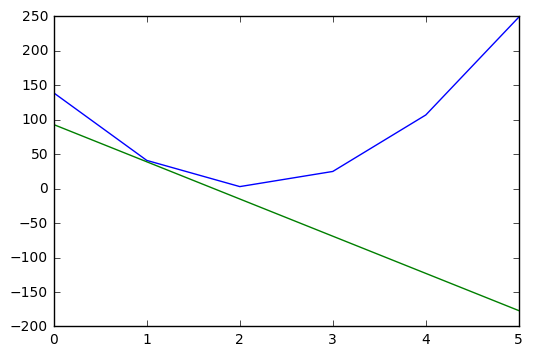

In [6]:
machine = Machine()
def loss(training_input):
    loss = 0
    for x in training_input:
        loss += (machine.h(x) - f(x))**2
        
    return loss

def gradient(training_input):
    bias = 0
    weight = 0
    for x in training_input:
        bias += 2*(machine.h(x) - f(x))
        weight += 2*(machine.h(x) - f(x)) * x
        
    return (bias, weight)    

iterations = 6
losses = []
gradients = []
for i in range(0,iterations):
    losses.append(loss(training_input))
    gradients.append(gradient(training_input))
    machine.w += 1
    machine.b += 1

print(losses)
print(gradients)

gradient1 = []
machine.b = gradients[1][0]
machine.w = gradients[1][1]
#for x in training_input:
for i in range(0,iterations):
    gradient1.append(machine.h(i) + 107)
    
print(gradient1)    
    
plt.plot(losses)
plt.plot(gradient1)
plt.show()    

-22
-106
322
5238
-12086
-257306
575042
12632166
-28139542
-620126218
[139, 275435, 662335531, 1596127142219, 3846504354185035]


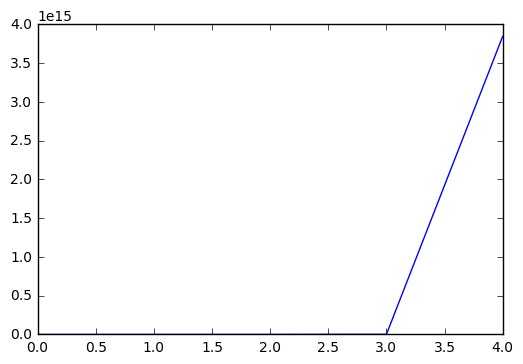

27576286
607746226


In [7]:
# Now let's actually use the Gradient descent
machine = Machine()
def gradient_descent(machine, training_input):
    iterations = 5
    losses = []
    for i in range(0,iterations):        
        losses.append(loss(training_input))
        db = 0
        dw = 0
        for x in training_input:
            db += 2*(machine.h(x) - f(x))
            dw += 2*(machine.h(x) - f(x)) * x
        print(db)
        print(dw)
        machine.b -= db
        machine.w -= dw
        
    print(losses)    
    plt.plot(losses)
    plt.show()

gradient_descent(machine, training_input)
print(machine.b)
print(machine.w)


Ok, something is clearly wrong. We take the gradient of loss function and decrease bias and weight according to that, but the result is not good. Loss actually increases ridiculously fast: difference between 3 and 4 iterations is so high that values before that won't even show on the graph.

The problem is we are changing bias and weight so drastically that their values keep overshooting the optimal values. What we want is minor changes so that the values slowly approach the optimum without fear of overshooting. To do this we will ad an extra parameter to the equation called alpha:

$$
\begin{align}
b &= b - \alpha\displaystyle\sum_{i=1}^m(h(x_i)-f(x_i)) \\
w &= w - \alpha\displaystyle\sum_{i=1}^m(h(x_i)-f(x_i))x_i \\
\end{align}
$$

If we set alpha just right gradient descent will be nice and smooth.

Now how do we pick the right value of alpha?

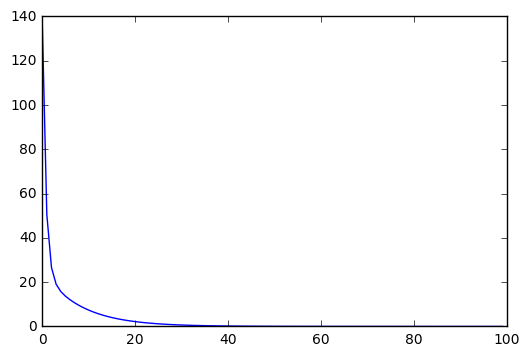

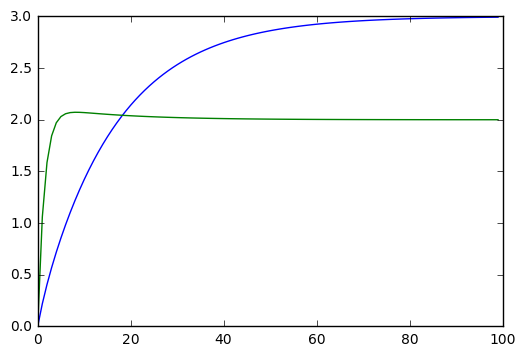

2.99342988992
2.00029802688


In [8]:
machine = Machine()
def gradient_descent(machine, training_input):
    alpha = 0.01
    iterations = 100
    losses = []
    biases = []
    weights = []
    for i in range(0,iterations):
        biases.append(machine.b)
        weights.append(machine.w)
        losses.append(loss(training_input))
        db = 0
        dw = 0
        for x in training_input:
            db += 2*(machine.h(x) - f(x))
            dw += 2*(machine.h(x) - f(x)) * x
        machine.b -= alpha * db
        machine.w -= alpha * dw
        
    #print(losses)    
    plt.plot(losses)
    plt.show()
    plt.plot(biases)
    plt.plot(weights)
    plt.show()

gradient_descent(machine, training_input)
print(machine.b)
print(machine.w)

By testing different values of $\alpha$ and different amounts of iterations we figure out that  0.01 is about the right value for alpha and with 100 iterations we can get to a pretty much perfect approximation: bias is 2.99 and weight is 2.00.